## If in Colab

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
in_colab = False
floatType = 32
last_data_idx = -1

In [3]:
import tensorflow as tf
if in_colab:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
if floatType == 16:
    tf.keras.backend.set_floatx('float16')

In [4]:
if in_colab:
    import sys
    data_dir = "/content/drive/MyDrive/data/"
    VOC2012_path = data_dir
    tracker_path = data_dir
    sys.path.append(tracker_path)
    ssd_weights_path = data_dir + "ssd_weights_epoch_0380.h5"
    checkpoint_filepath = data_dir + "weights/"
else:
    data_dir = "../data/"
    VOC2012_path = data_dir + "VOCdevkit/"
    tracker_path = "../Tracking_SSD_ReID/"
    ssd_weights_path = data_dir + "ssd_weights_epoch_0380.h5"
    checkpoint_filepath = data_dir + "segmentation_weights/"

## Import model

In [5]:
from models.FCN8 import FCN8
model = FCN8(tracker_ssd_path = tracker_path, 
             ssd_weights_path = ssd_weights_path,
             floatType = floatType,
             n_classes = 3)

In [ ]:
model_saved = tf.keras.models.load_model("../data/segmentation_weights/")

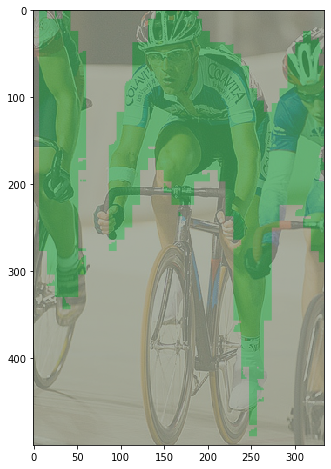

In [40]:
pltPredOnImg(model_saved, "../data/VOCdevkit/VOC2012/JPEGImages_forSeg/2007_000129.jpg", 3, save_path="../data/results.png")